<a href="https://colab.research.google.com/github/BoranOner/Predicting-Diabetes/blob/main/Sat%C4%B1rEksikDengesiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt    # visualization library (görselleştirme kütüphanesi)
import seaborn as sns         # visualization library (görselleştirme kütüphanesi)
import missingno as msno      # visualization library (görselleştirme kütüphanesi)
 #Hiperparametre için çağırıldı


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#**VERİ GÖRSELLEŞTİRME**

In [306]:
dataFrame = pd.read_csv("https://raw.githubusercontent.com/BoranOner/Predicting-Diabetes/main/diabetes.csv" ,encoding = 'unicode_escape')
print(dataFrame)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [307]:
df1 = dataFrame.copy()
df2 = dataFrame.copy()
df3 = dataFrame.copy()

In [308]:
df1 = pd.DataFrame(df1)

In [309]:
df1.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [310]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [311]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [312]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


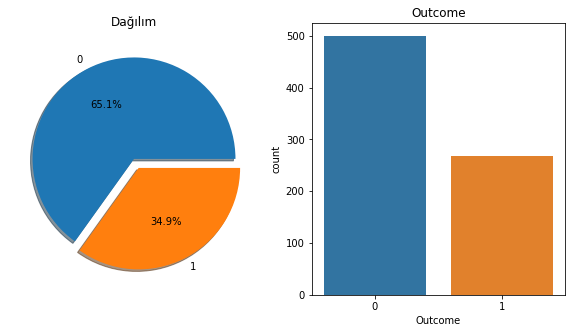

In [313]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df1['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Dağılım')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df1,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [314]:
df1.isnull().sum()  # null değer gözükmüyor 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [315]:
df1[["Glucose","BloodPressure",
     "BMI"]] = df1[["Glucose","BloodPressure",
     "BMI"]].replace(0,np.NaN)
df1.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

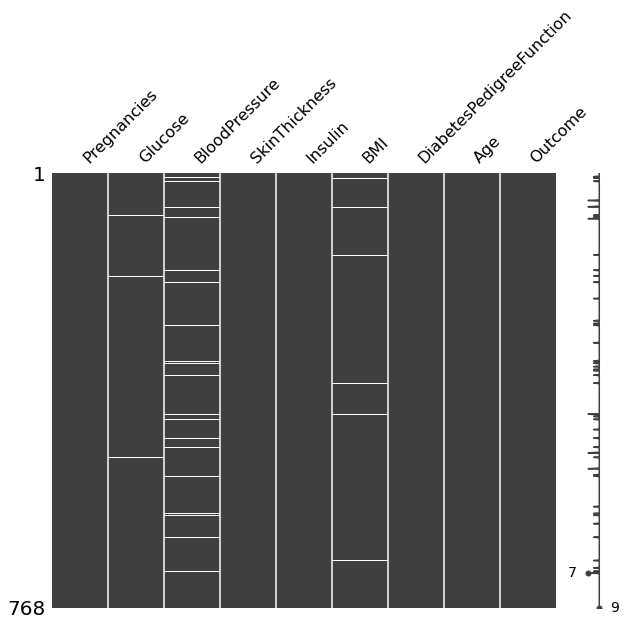

In [316]:
msno.matrix(df1,figsize=(10,8))
plt.show()

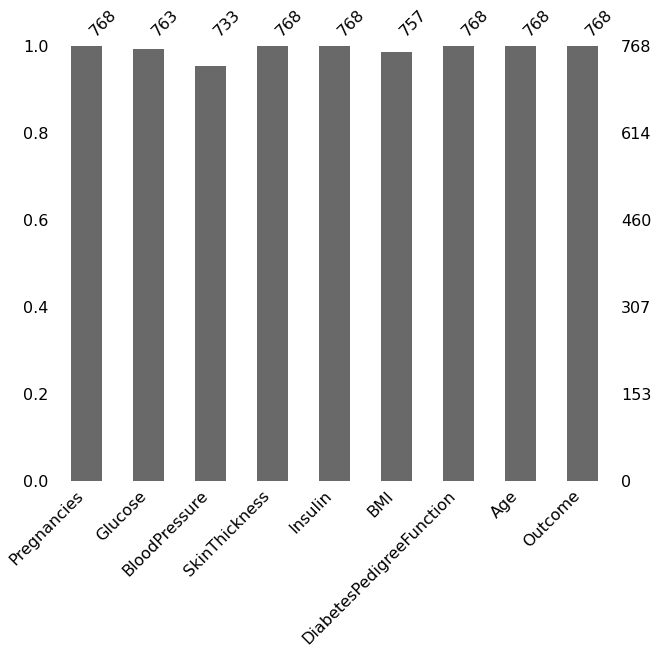

In [317]:
msno.bar(df1,figsize=(10,8))
plt.show()


In [318]:
df1.dropna(inplace = True)


In [319]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 56.6 KB


#***Standartlaştırma*** 

In [320]:
from sklearn.preprocessing import RobustScaler



rob_scaler = RobustScaler()
df1['Pregnancies'] = rob_scaler.fit_transform(df1['Pregnancies'].values.reshape(-1,1))
df1['Glucose'] = rob_scaler.fit_transform(df1['Glucose'].values.reshape(-1,1))
df1['BloodPressure'] = rob_scaler.fit_transform(df1['BloodPressure'].values.reshape(-1,1))
df1['BMI'] = rob_scaler.fit_transform(df1['BMI'].values.reshape(-1,1))
df1['DiabetesPedigreeFunction'] = rob_scaler.fit_transform(df1['DiabetesPedigreeFunction'].values.reshape(-1,1))
df1['Age'] = rob_scaler.fit_transform(df1['Age'].values.reshape(-1,1))
df1['Insulin'] = rob_scaler.fit_transform(df1['Insulin'].values.reshape(-1,1))
df1['SkinThickness'] = rob_scaler.fit_transform(df1['SkinThickness'].values.reshape(-1,1))
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.733728,0.000,0.333333,-0.367816,0.131868,0.648366,1.235294,1
1,-0.4,-0.757396,-0.375,0.151515,-0.367816,-0.637363,-0.073203,0.117647,0
2,1.0,1.562130,-0.500,-0.727273,-0.367816,-1.000000,0.766013,0.176471,1
3,-0.4,-0.662722,-0.375,-0.030303,0.352490,-0.472527,-0.554248,-0.470588,0
4,-0.6,0.473373,-2.000,0.333333,0.919540,1.175824,4.990850,0.235294,1


In [321]:
# veri setini train ve test olarak ayırıyoruz

from sklearn.model_selection import train_test_split

X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)



---

*Dengesiz Veri Seti*

---



In [322]:
y_train.value_counts()    


0    377
1    202
Name: Outcome, dtype: int64



---


#GAUSSIAN NB

---



In [323]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [324]:
gaussianNB = GaussianNB()
gaussianNB = gaussianNB.fit(X_train, y_train)

train_pred_gaussianNB = gaussianNB.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Train: ")
print(confusion_matrix(y_train, train_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gaussianNB))

print("-"*40)

test_pred_gaussianNB = gaussianNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Test: ")
print(confusion_matrix(y_test, test_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gaussianNB))

Train Accuracy : 77.202% 
Confusion Matrix-GaussianNB-Train: 
[[322  55]
 [ 77 125]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       377
           1       0.69      0.62      0.65       202

    accuracy                           0.77       579
   macro avg       0.75      0.74      0.74       579
weighted avg       0.77      0.77      0.77       579

----------------------------------------
Test Accuracy  : 74.483% 
Confusion Matrix-GaussianNB-Test: 
[[81 17]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        98
           1       0.61      0.57      0.59        47

    accuracy                           0.74       145
   macro avg       0.71      0.70      0.70       145
weighted avg       0.74      0.74      0.74       145



0.7364616435118313

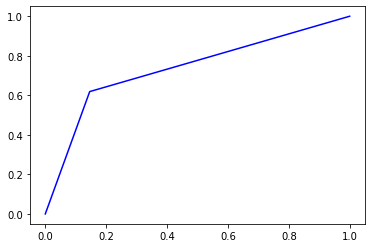

In [325]:
fpr , tpr , thresolds = metrics.roc_curve(y_train , train_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7004993486756405

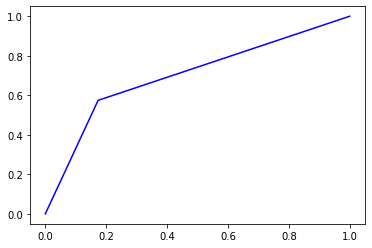

In [326]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
GaussianNB Hiperparametre ile

---




In [327]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': [0.12328467394420659]}  #0-1 aralğı test ediliyor
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid=params_NB,verbose=1, scoring='accuracy') 
 
#Train Sınıflandırma raporunu yazdırmak
gs_NB.fit(X_train,y_train) 
gs_NB_pre = gs_NB.predict(X_train)
print(classification_report(y_train , gs_NB_pre))
print("Training Skoru:",accuracy_score(y_train , gs_NB_pre))

#Test Sınıflandırma raporunu yazdırmak
gs_NB.fit(X_test,y_test) 
gs_NB_pre = gs_NB.predict(X_test)
print(classification_report(y_test , gs_NB_pre))
print("Test Skoru:",accuracy_score(y_test , gs_NB_pre))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       377
           1       0.73      0.59      0.65       202

    accuracy                           0.78       579
   macro avg       0.77      0.74      0.75       579
weighted avg       0.78      0.78      0.77       579

Training Skoru: 0.7806563039723662
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        98
           1       0.63      0.55      0.59        47

    accuracy                           0.75       145
   macro avg       0.72      0.70      0.71       145
weighted avg       0.74      0.75      0.75       145

Test Skoru: 0.7517241379310344




---



#**BERNOULLI NB**



---



In [328]:
from sklearn.naive_bayes import BernoulliNB

bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train, y_train)

train_pred_bernoulliNB = bernoulliNB.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Train: ")
print(confusion_matrix(y_train, train_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_bernoulliNB))

print("-"*40)


test_pred_bernoulliNB = bernoulliNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Test: ")
print(confusion_matrix(y_test, test_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_bernoulliNB))





Train Accuracy : 72.021% 
Confusion Matrix-BernoulliNB-Train: 
[[303  74]
 [ 88 114]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       377
           1       0.61      0.56      0.58       202

    accuracy                           0.72       579
   macro avg       0.69      0.68      0.69       579
weighted avg       0.72      0.72      0.72       579

----------------------------------------
Test Accuracy  : 76.552% 
Confusion Matrix-BernoulliNB-Test: 
[[85 13]
 [21 26]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        98
           1       0.67      0.55      0.60        47

    accuracy                           0.77       145
   macro avg       0.73      0.71      0.72       145
weighted avg       0.76      0.77      0.76       145



0.6840349817475117

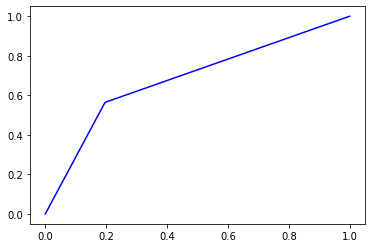

In [329]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



0.7102692140686062

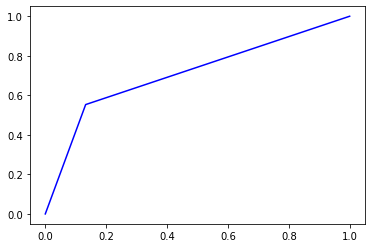

In [330]:


fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
BernoulliNB Hiperparametre İle

---




In [331]:
from sklearn.naive_bayes import BernoulliNB



In [332]:
parameters = {'alpha': [0.1]}    #np.linspace(0.1,1,10) denendi en iyi alpha değer 0.1 bulundu

clf = GridSearchCV(BernoulliNB(), parameters)

#Train Sınıflandırma raporunu yazdırmak
clf.fit(X_train,y_train) 
clf_pre = clf.predict(X_train)
print(classification_report(y_train , clf_pre))
print("Training Skoru:",accuracy_score(y_train , clf_pre))

#Test Sınıflandırma raporunu yazdırmak
clf.fit(X_test,y_test) 
clf_pre = clf.predict(X_test)
print(classification_report(y_test , clf_pre))
print("Test Skoru:",accuracy_score(y_test , clf_pre))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       377
           1       0.61      0.56      0.58       202

    accuracy                           0.72       579
   macro avg       0.69      0.68      0.69       579
weighted avg       0.72      0.72      0.72       579

Training Skoru: 0.7202072538860104
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        98
           1       0.58      0.53      0.56        47

    accuracy                           0.72       145
   macro avg       0.68      0.67      0.68       145
weighted avg       0.72      0.72      0.72       145

Test Skoru: 0.7241379310344828


In [333]:
print("En İyi Parametrelerin Verdiği Skor:",clf.best_score_)

En İyi Parametrelerin Verdiği Skor: 0.7034482758620689




---



#**LogisticRegression**



---



In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [335]:
logisticRegression = LogisticRegression(random_state=123456)
logisticRegression.fit(X_train, y_train)


train_pred_logisticRegression = logisticRegression.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Train: ")
print(confusion_matrix(y_train, train_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_logisticRegression))

print("-"*40)

test_pred_logisticRegression = logisticRegression.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Test: ")
print(confusion_matrix(y_test, test_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_logisticRegression))

Train Accuracy : 78.756% 
Confusion Matrix-LogisticRegression-Train: 
[[336  41]
 [ 82 120]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       377
           1       0.75      0.59      0.66       202

    accuracy                           0.79       579
   macro avg       0.77      0.74      0.75       579
weighted avg       0.78      0.79      0.78       579

----------------------------------------
Test Accuracy  : 75.862% 
Confusion Matrix-LogisticRegression-Test: 
[[88 10]
 [25 22]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        98
           1       0.69      0.47      0.56        47

    accuracy                           0.76       145
   macro avg       0.73      0.68      0.70       145
weighted avg       0.75      0.76      0.74       145



0.7426530451453633

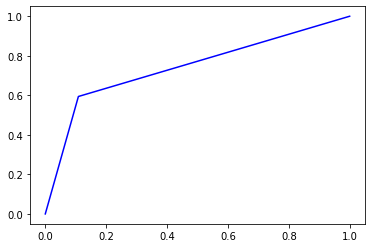

In [336]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6830221450282241

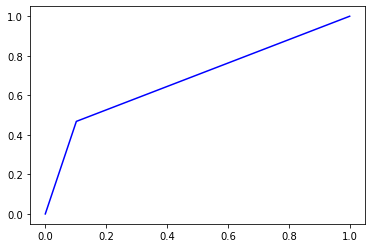

In [337]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Logistic Regression Hiperparametreler İle

---




In [338]:
param ={"C":np.logspace(20,40,60), "penalty":["l2","none"]}  # logistic regresyon tekrar bak 

cv = GridSearchCV(LogisticRegression(), param, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_train,y_train)


#Train Sınıflandırma raporunu yazdırmak
cv.fit(X_train,y_train) 
cv_pre = cv.predict(X_train)
print(classification_report(y_train , cv_pre))
print("Training Skoru:",accuracy_score(y_train , cv_pre))

#Test Sınıflandırma raporunu yazdırmak
cv.fit(X_test,y_test) 
cv_pre = cv.predict(X_test)
print(classification_report(y_test , cv_pre))
print("Test Skoru:",accuracy_score(y_test , cv_pre))



              precision    recall  f1-score   support

           0       0.80      0.89      0.84       377
           1       0.74      0.59      0.66       202

    accuracy                           0.79       579
   macro avg       0.77      0.74      0.75       579
weighted avg       0.78      0.79      0.78       579

Training Skoru: 0.7858376511226253
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        98
           1       0.68      0.53      0.60        47

    accuracy                           0.77       145
   macro avg       0.74      0.70      0.72       145
weighted avg       0.76      0.77      0.76       145

Test Skoru: 0.7655172413793103




---



#**DECISION TREE**



---



In [339]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [340]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

train_pred_decision_tree = decision_tree.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Train: ")
print(confusion_matrix(y_train, train_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_decision_tree))

print("-"*40)

test_pred_decision_tree = decision_tree.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Test: ")
print(confusion_matrix(y_test, test_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_decision_tree))

Train Accuracy : 100.000% 
Confusion Matrix-DecisionTreeClassifier-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  : 68.276% 
Confusion Matrix-DecisionTreeClassifier-Test: 
[[72 26]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.78      0.73      0.76        98
           1       0.51      0.57      0.54        47

    accuracy                           0.68       145
   macro avg       0.65      0.65      0.65       145
weighted avg       0.69      0.68      0.69       145



1.0

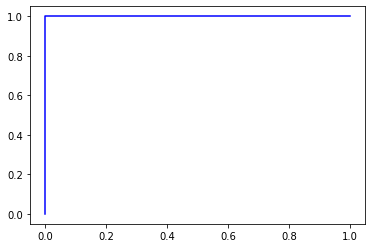

In [341]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6545809813287016

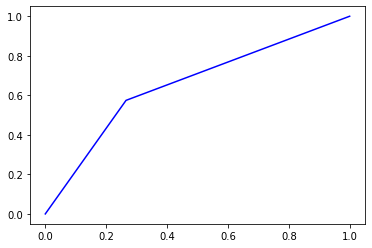

In [342]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

---
Decision Tree Hiperparametreler İle

---




In [343]:
param_dict= {"criterion":['gini'],   #gini ve entropy denendi
             "max_depth"          : [6], #1-8 aralığında denendi
             "min_samples_split"  : [4], #1-10 aralığında denendi
             "min_samples_leaf"   : [1], #1-5 aralığında denendi
            }

detr=DecisionTreeClassifier()
detr_cv = GridSearchCV (detr,param_dict, verbose=0)

#Train Sınıflandırma raporunu yazdırmak
detr_cv.fit(X_train,y_train) 
print("En İyi Parametrelerin Verdiği Skor:",detr_cv.best_params_)
detr_cv_pre = detr_cv.predict(X_train)
print(classification_report(y_train , detr_cv_pre))
print("Training Skoru:",accuracy_score(y_train , detr_cv_pre))

#Test Sınıflandırma raporunu yazdırmak
detr_cv.fit(X_test,y_test) 
detr_cv_pre = detr_cv.predict(X_test)
print(classification_report(y_test , detr_cv_pre))
print("Test Skoru:",accuracy_score(y_test , detr_cv_pre))


En İyi Parametrelerin Verdiği Skor: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
              precision    recall  f1-score   support

           0       0.85      0.96      0.91       377
           1       0.91      0.69      0.79       202

    accuracy                           0.87       579
   macro avg       0.88      0.83      0.85       579
weighted avg       0.87      0.87      0.86       579

Training Skoru: 0.8687392055267703
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.94      0.96      0.95        47

    accuracy                           0.97       145
   macro avg       0.96      0.96      0.96       145
weighted avg       0.97      0.97      0.97       145

Test Skoru: 0.9655172413793104




---



#**SVM (SUPPORT VECTOR MACHINE)**



---



In [344]:
from sklearn import svm
from sklearn.svm import SVC

sv = svm.SVC(kernel='linear') 
sv.fit(X_train , y_train)

train_pred_svm =  sv.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_svm)*100))

print("Confusion Matrix-SVM TRAIN: ")
print(confusion_matrix(y_train, train_pred_svm))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_svm))

print("-"*40)

test_pred_svm = sv.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_svm)*100))

print("Confusion Matrix-SVM TEST: ")
print(confusion_matrix(y_test, test_pred_svm))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_svm))

Train Accuracy : 78.584% 
Confusion Matrix-SVM TRAIN: 
[[335  42]
 [ 82 120]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       377
           1       0.74      0.59      0.66       202

    accuracy                           0.79       579
   macro avg       0.77      0.74      0.75       579
weighted avg       0.78      0.79      0.78       579

----------------------------------------
Test Accuracy  : 72.414% 
Confusion Matrix-SVM TEST: 
[[85 13]
 [27 20]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        98
           1       0.61      0.43      0.50        47

    accuracy                           0.72       145
   macro avg       0.68      0.65      0.65       145
weighted avg       0.71      0.72      0.71       145



0.7413267851984138

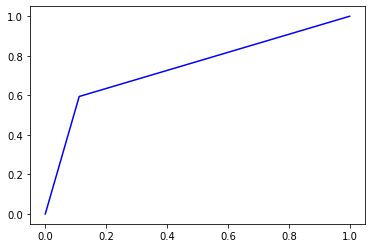

In [345]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6464394268345636

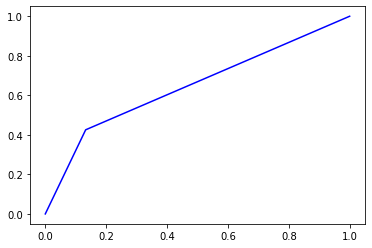

In [346]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
SVM Hiperparametre İle


---




In [347]:
#Parametrenin Sınırlarını Belirtme

param_grid = {'C': [1000], # C=(0.1, 1, 10, 100, 1000) aralığında denendi
              'gamma': [ 0.0001], # C=(0.0001 , 0.01 , 0.1 , 1) aralığında denendi
              'kernel': ['rbf'], # "rbf", "linear" ve "sigmoid" denendi.
              'class_weight' : ['balanced']}  # "none" , "balanced" ve "dict" denendi.
model=SVC()
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)


#print("En İyi Parametrelerin Verdiği Skor:",grid_svm.best_params_)

#Train Sınıflandırma raporunu yazdırmak
grid_svm.fit(X_train,y_train) 
grid_svm_pre = grid_svm.predict(X_train)
print(classification_report(y_train , grid_svm_pre))
print("Training Skoru:",accuracy_score(y_train , grid_svm_pre))

#Test Sınıflandırma raporunu yazdırmak
grid_svm.fit(X_test,y_test) 
grid_svm_pre = grid_svm.predict(X_test)
print(classification_report(y_test , grid_svm_pre))
print("Test Skoru:",accuracy_score(y_test , grid_svm_pre))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       377
           1       0.67      0.72      0.70       202

    accuracy                           0.78       579
   macro avg       0.76      0.77      0.76       579
weighted avg       0.79      0.78      0.78       579

Training Skoru: 0.7806563039723662
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        98
           1       0.61      0.81      0.70        47

    accuracy                           0.77       145
   macro avg       0.75      0.78      0.76       145
weighted avg       0.80      0.77      0.78       145

Test Skoru: 0.7724137931034483


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


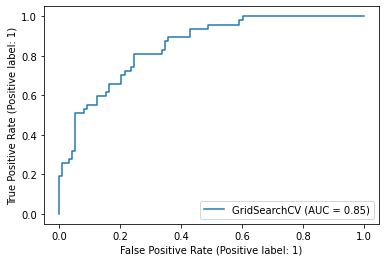

In [348]:
plot_roc_curve(grid_svm, X_test , y_test)



---



#**KNN (K-NEAREST NEIGHBORS)**



---



In [349]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

train_pred_knn =  knn.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_knn)*100))

print("Confusion Matrix-KNN TRAIN: ")
print(confusion_matrix(y_train, train_pred_knn))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_knn))

print("-"*40)

test_pred_knn = knn.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_knn)*100))

print("Confusion Matrix-KNN TEST: ")
print(confusion_matrix(y_test, test_pred_knn))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_knn))

Train Accuracy : 81.002% 
Confusion Matrix-KNN TRAIN: 
[[333  44]
 [ 66 136]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       377
           1       0.76      0.67      0.71       202

    accuracy                           0.81       579
   macro avg       0.80      0.78      0.79       579
weighted avg       0.81      0.81      0.81       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-KNN TEST: 
[[82 16]
 [22 25]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        98
           1       0.61      0.53      0.57        47

    accuracy                           0.74       145
   macro avg       0.70      0.68      0.69       145
weighted avg       0.73      0.74      0.73       145



0.6843247937472862

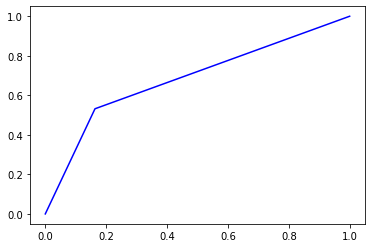

In [350]:
fpr , tpr , thresolds = metrics.roc_curve(y_test,test_pred_knn)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---



*KNN modeli için hiperparametreleri bulma*

---



In [351]:
param_grid = {
              'n_neighbors': [19],  #3, 5, 11, 19 denendi
              'weights': ['uniform'], #uniform ve distance denendi
              'metric': ['manhattan'] # euclideans ve manhattan denendi
              }
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid,scoring='roc_auc', refit = True, cv=stratified_kfold,  verbose = 1)

#Train Sınıflandırma raporunu yazdırmak
grid_search.fit(X_train,y_train) 
grid_search_pre = grid_search.predict(X_train)
print(classification_report(y_train , grid_search_pre))
print("Training Skoru:",accuracy_score(y_train , grid_search_pre))

#Test Sınıflandırma raporunu yazdırmak
grid_search.fit(X_test,y_test) 
grid_search_pre = grid_search.predict(X_test)
print(classification_report(y_test , grid_search_pre))
print("Test Skoru:",accuracy_score(y_test , grid_search_pre))

 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.79      0.90      0.85       377
           1       0.76      0.56      0.65       202

    accuracy                           0.79       579
   macro avg       0.78      0.73      0.75       579
weighted avg       0.78      0.79      0.78       579

Training Skoru: 0.7858376511226253
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.76      0.98      0.85        98
           1       0.89      0.34      0.49        47

    accuracy                           0.77       145
   macro avg       0.82      0.66      0.67       145
weighted avg       0.80      0.77      0.74       145

Test Skoru: 0.7724137931034483


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


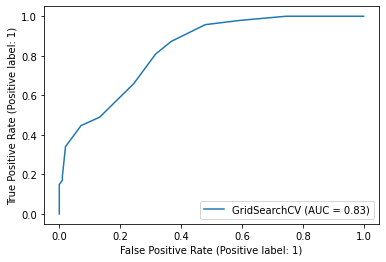

In [352]:
plot_roc_curve(grid_search, X_test, y_test)



---



#**MLP (MULTILAYER PERCEPTRON)**



---



In [353]:
from sklearn.neural_network import MLPClassifier

In [354]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train , y_train)


train_pred_mlp =  mlp.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_mlp)*100))

print("Confusion Matrix-KNN TRAIN: ")
print(confusion_matrix(y_train, train_pred_mlp))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_mlp))

print("-"*40)

test_pred_mlp = mlp.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_mlp)*100))

print("Confusion Matrix-KNN TEST: ")
print(confusion_matrix(y_test, test_pred_mlp))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_mlp))

Train Accuracy : 91.537% 
Confusion Matrix-KNN TRAIN: 
[[354  23]
 [ 26 176]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       377
           1       0.88      0.87      0.88       202

    accuracy                           0.92       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.92      0.92      0.92       579

----------------------------------------
Test Accuracy  : 71.724% 
Confusion Matrix-KNN TEST: 
[[79 19]
 [22 25]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        98
           1       0.57      0.53      0.55        47

    accuracy                           0.72       145
   macro avg       0.68      0.67      0.67       145
weighted avg       0.71      0.72      0.71       145



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.6690186712983065

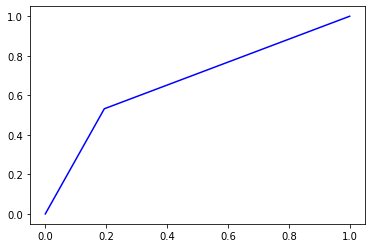

In [355]:
fpr , tpr , thresolds = metrics.roc_curve(y_test,test_pred_mlp)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Hiperparametre ile MLP

---





In [356]:
mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'max_iter': [100],   #100-300 aralığı denendi 
    'hidden_layer_sizes': [(10,30,10)], # C = [(10,30,10),(20,)] aralığında denendi
    'activation': ['tanh'], #"tanh" ve "relu" denendi
    'solver': ['adam'],  #"sgd" ve "adam" denendi
    'alpha': [0.25],    #-1-1  aralığı denendi
    'learning_rate': ['adaptive'], #"constant" ve "adaptive" denendi
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=5, cv=5)

#Train Sınıflandırma raporunu yazdırmak
clf.fit(X_train,y_train) 
clf_pre = clf.predict(X_train)
print(classification_report(y_train , clf_pre))
print("Training Skoru:",accuracy_score(y_train , clf_pre))

#Test Sınıflandırma raporunu yazdırmak
clf.fit(X_test,y_test) 
clf_pre = clf.predict(X_test)
print(classification_report(y_test , clf_pre))
print("Test Skoru:",accuracy_score(y_test , clf_pre))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       377
           1       0.74      0.64      0.69       202

    accuracy                           0.80       579
   macro avg       0.78      0.76      0.77       579
weighted avg       0.79      0.80      0.79       579

Training Skoru: 0.7962003454231433
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.65      0.51      0.57        47

    accuracy                           0.75       145
   macro avg       0.72      0.69      0.70       145
weighted avg       0.74      0.75      0.74       145

Test Skoru: 0.7517241379310344


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [357]:
grid_predictions = mlp.predict(X_test)

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        98
           1       0.57      0.53      0.55        47

    accuracy                           0.72       145
   macro avg       0.68      0.67      0.67       145
weighted avg       0.71      0.72      0.71       145



Hiperparametre ile Grafik

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


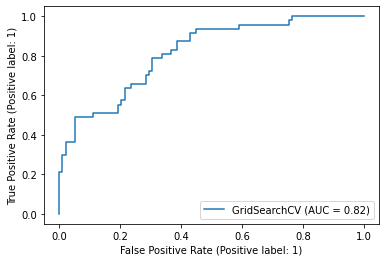

In [358]:
plot_roc_curve(clf, X_test, y_test)



---



#**RANDOM FOREST**



---



In [359]:
from sklearn.ensemble import RandomForestClassifier as randomForest
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score
from sklearn import metrics


In [360]:
randomForest = randomForest()
randomForest.fit(X_train,y_train)

train_pred_randomForest = randomForest.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_randomForest)*100))
print("Confusion Matrix-randomForest-Train: ")
print(confusion_matrix(y_train, train_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_randomForest))

print("-"*40)

test_pred_randomForest = randomForest.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_randomForest)*100))

print("Confusion Matrix-randomForest-Test: ")
print(confusion_matrix(y_test, test_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_randomForest))

Train Accuracy : 100.000% 
Confusion Matrix-randomForest-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  : 76.552% 
Confusion Matrix-randomForest-Test: 
[[86 12]
 [22 25]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.88      0.83        98
           1       0.68      0.53      0.60        47

    accuracy                           0.77       145
   macro avg       0.74      0.70      0.72       145
weighted avg       0.76      0.77      0.76       145



1.0

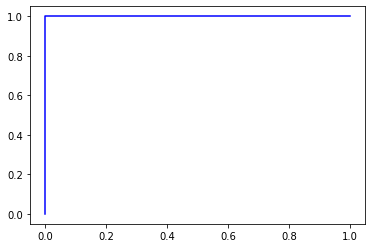

In [361]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7047329570125923

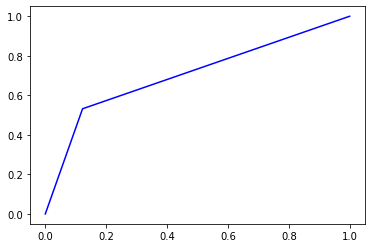

In [362]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Random Forest Hiperparametre İle


---




In [363]:
rf_params = {
            'max_depth': [None], # Depth aralığı None-50 arası denendi. 
            'min_samples_leaf': [1],  # 1-10 aralığı denendi
            'min_samples_split': [2], # 1-10 aralığı denendi  
            'n_estimators': [2000] # 10-2000 aralığı denendi
             }

cv_rf = GridSearchCV(randomForest,rf_params,cv=5,verbose=False,n_jobs=-1).fit(X_test,y_test)

#Train Sınıflandırma raporunu yazdırmak
cv_rf.fit(X_train,y_train) 
cv_rf_pre = cv_rf.predict(X_train)
print(classification_report(y_train , cv_rf_pre))
print("Training Skoru:",accuracy_score(y_train , cv_rf_pre))

#Test Sınıflandırma raporunu yazdırmak
cv_rf.fit(X_test,y_test) 
cv_rf_pre = cv_rf.predict(X_test)
print(classification_report(y_test , cv_rf_pre))
print("Test Skoru:",accuracy_score(y_test , cv_rf_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

Training Skoru: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        47

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145

Test Skoru: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


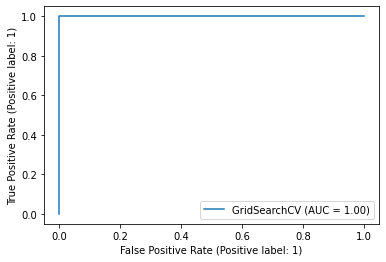

In [364]:
plot_roc_curve(cv_rf, X_test, y_test)



---



#**GRADIENT BOOSTING**



---



In [365]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting

In [366]:
gradientBoosting = gradientBoosting()
gradientBoosting.fit(X_train, y_train)

train_pred_gradientBoosting = gradientBoosting.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Train: ")
print(confusion_matrix(y_train, train_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gradientBoosting))

print("-"*40)

test_pred_gradientBoosting = gradientBoosting.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Test: ")
print(confusion_matrix(y_test, test_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gradientBoosting))

Train Accuracy : 93.264% 
Confusion Matrix-gradientBoosting-Train: 
[[369   8]
 [ 31 171]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       377
           1       0.96      0.85      0.90       202

    accuracy                           0.93       579
   macro avg       0.94      0.91      0.92       579
weighted avg       0.93      0.93      0.93       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-gradientBoosting-Test: 
[[82 16]
 [22 25]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        98
           1       0.61      0.53      0.57        47

    accuracy                           0.74       145
   macro avg       0.70      0.68      0.69       145
weighted avg       0.73      0.74      0.73       145



In [367]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting

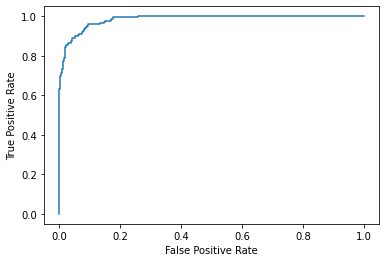

In [368]:
clf = make_pipeline(StandardScaler(), gradientBoosting())
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_train)

fpr, tpr, _ = roc_curve(y_train, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

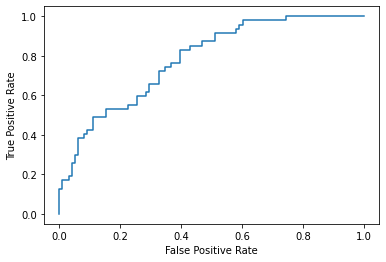

In [369]:
clf = make_pipeline(StandardScaler(), gradientBoosting())
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()



---
Gradient Boosting Hiperparametre İle


---




In [370]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting


param    = {
              "criterion": ["friedman_mse"], # "friedman_mse"ve"squared_error" denendi
              "loss":["exponential"], # "deviance"ve"exponential","squared_error" denendi
              "max_features":["log2"], # "log2" ve "sqrt" denendi
              'learning_rate': [1],   # 0.01-1 aralığı denendi
              'max_depth': [3], # 1-8 aralığı denendi
              'min_samples_leaf': [4], # [4,5,6] denendi
              'subsample': [0.8], # [0.6,0.7,0.8,0.9,1] denendi
              'n_estimators': [5], # 5-20 aralığı denendi
              
            }
    
model_gboosting = gradientBoosting()
grid_gb  = GridSearchCV(model_gboosting , param , verbose=1)

#Train Sınıflandırma raporunu yazdırmak
grid_gb.fit(X_train,y_train) 
grid_gb_pre = grid_gb.predict(X_train)
print(classification_report(y_train , grid_gb_pre))
print("Training Skoru:",accuracy_score(y_train , grid_gb_pre))

#Test Sınıflandırma raporunu yazdırmak
grid_gb.fit(X_test,y_test) 
grid_gb_pre = grid_gb.predict(X_test)
print(classification_report(y_test , grid_gb_pre))
print("Test Skoru:",accuracy_score(y_test , grid_gb_pre))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       377
           1       0.79      0.69      0.73       202

    accuracy                           0.83       579
   macro avg       0.81      0.79      0.80       579
weighted avg       0.82      0.83      0.82       579

Training Skoru: 0.8255613126079447
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        98
           1       0.90      0.77      0.83        47

    accuracy                           0.90       145
   macro avg       0.90      0.86      0.88       145
weighted avg       0.90      0.90      0.89       145

Test Skoru: 0.896551724137931




---



#**XG BOOST**



---



In [371]:
import xgboost as xgb
from xgboost import XGBClassifier as xgBoost


In [372]:
xgBoost = xgBoost(use_label_encoder=False,eval_metric = 'error')

xgBoost.fit(X_train, y_train)

train_pred_xgBoost = xgBoost.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Train: ")
print(confusion_matrix(y_train, train_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_xgBoost))

print("-"*40)

test_pred_xgBoost = xgBoost.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Test: ")
print(confusion_matrix(y_test, test_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_xgBoost))

Train Accuracy : 89.465% 
Confusion Matrix-xgBoost-Train: 
[[354  23]
 [ 38 164]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       377
           1       0.88      0.81      0.84       202

    accuracy                           0.89       579
   macro avg       0.89      0.88      0.88       579
weighted avg       0.89      0.89      0.89       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-xgBoost-Test: 
[[81 17]
 [21 26]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        98
           1       0.60      0.55      0.58        47

    accuracy                           0.74       145
   macro avg       0.70      0.69      0.69       145
weighted avg       0.73      0.74      0.73       145



0.8754366152795651

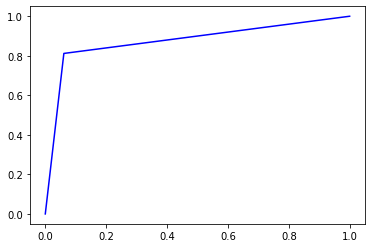

In [373]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6898610508033001

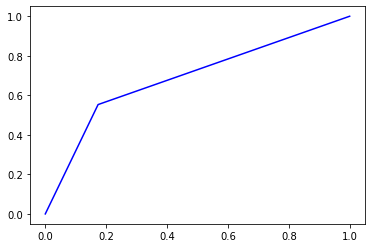

In [374]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
XGBoost Hiperparametreler İle


---




In [375]:
from xgboost import XGBClassifier
model_xgb   = XGBClassifier(seed=None)
parameters  = {
                "max_depth": [6], #1-100 aralığı denendi
                "n_estimators": [180], # 1-220 aralığı denendi
                "learning_rate": [0.01]  # 0.01-0.05 aralığı denendi
                }

grid_xgb   = GridSearchCV (model_xgb , parameters, verbose=1) 

#Train Sınıflandırma raporunu yazdırmak
grid_xgb.fit(X_train,y_train) 
grid_xgb_pre = grid_xgb.predict(X_train)
print(classification_report(y_train , grid_xgb_pre))
print("Training Skoru:",accuracy_score(y_train , grid_xgb_pre))

#Test Sınıflandırma raporunu yazdırmak
grid_xgb.fit(X_test,y_test) 
grid_xgb_pre = grid_xgb.predict(X_test)
print(classification_report(y_test , grid_xgb_pre))
print("Test Skoru:",accuracy_score(y_test , grid_xgb_pre))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       377
           1       0.93      0.86      0.89       202

    accuracy                           0.93       579
   macro avg       0.93      0.91      0.92       579
weighted avg       0.93      0.93      0.93       579

Training Skoru: 0.927461139896373
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        98
           1       0.94      0.98      0.96        47

    accuracy                           0.97       145
   macro avg       0.96      0.97      0.97       145
weighted avg       0.97      0.97      0.97       145

Test Skoru: 0.9724137931034482


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


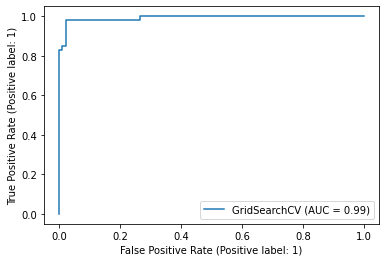

In [376]:
plot_roc_curve(grid_xgb, X_test, y_test)